# Measuring Quantum Volume

![hero:quantum volume](images/quantum_volume.png)


## Why quantum volume?

Comparing different quantum computers is not an easy task. There are many different factors that affect the performance of a quantum computer and it’s not always clear which factors will have the biggest effect when doing useful quantum computations.

Say you were designing your quantum computer: Would you trade higher fidelity gates (with less errors) for reduced qubit connectivity (requiring longer circuits)? Maybe you have a great [transpiler](gloss:transpiler) that can organise the swaps so reduced connectivity isn’t as much of an issue. Or maybe the readout errors are so high that any improvement in gate fidelity is negligible anyway? We can add each of these statistics to our quantum computer scorecard, but the exact importance of each element is up for debate. Even if we manage to score highly at each individual metric, there could still be other unforeseen problems that arise when running quantum circuits.

One thing is certain, to achieve a [quantum advantage](gloss:quantum-advantage), we need many qubits, and the ability to manipulate them precisely . If we don't have enough qubits, we can't do any useful computations, and if these qubits are not precise or reliable enough, then our measurements will be meaningless.

<!-- ::: q-block.tabs -->

## What affects computing power?


<!-- ::: tab -->

### Qubit count

<!-- ::: column(width=350) -->

**Number of qubits (more is better)**

The number of qubits in our quantum computer sets an upper limit on the power of the computations it can do. To gain advantage over classical computers, we want to be able to entangle as many qubits as possible.

<!-- ::: column(width=250) -->

<img src="images/qubit_count.png" width="195"/>
    
<!-- ::: -->

<!-- ::: tab -->

### Readout errors

<!-- ::: column(width=350) -->

**Gate and readout errors (less is better)**

As mentioned above, the errors in our quantum computer also set an upper limit on the power of our quantum computer. If we can’t reliably manipulate our quantum states, then we’re not going to get meaningful results from our quantum computer.

<!-- ::: column(width=250) -->
    
<img src="images/readout_errors.png" width="195"/>
    
<!-- ::: -->

<!-- ::: tab -->

### Connectivity

<!-- ::: column(width=350) -->

**Qubit-Qubit connectivity (more is better)**

If two qubits cannot communicate directly, we need to add extra ‘swap’ gates to move them to the right place, increasing the length of our computation. Quantum volume circuits assume full connectivity, so if you need to insert extra swap gates, that’s on you!

<!-- ::: column(width=250) -->

<img src="images/connectivity.png" width="195"/>
    
<!-- ::: -->

<!-- ::: tab -->

### Gate set

<!-- ::: column(width=350) -->

**Gate set (larger / more powerful is better)**

Quantum volume asks for random two-qubit gates, but working out how to implement them is also on you. If your hardware supports more gates, you’re more likely to get decent results.

<!-- ::: column(width=250) -->

<img src="images/gate_set.png" width="195"/>
    
<!-- ::: -->

<!-- ::: tab -->

### Software stack

<!-- ::: column(width=350) -->

**Compilers and software stack (more intelligent is better)**
    
Some other problems (inserting extra swap gates, creating the specified gates from your available gate set, and dealing with noise) can be mitigated using intelligent classical software such as the transpiler.

<!-- ::: column(width=250) -->

<img src="images/software_stack.png" width="195"/>
    
<!-- ::: -->

<!-- ::: -->

<!-- ::: -->


This is where quantum volume comes in. Quantum volume is a _holistic_ benchmark. Instead of looking at the details, we simply measure how good the quantum computer is at doing the thing we want it to do: running quantum circuits. The quantum volume test creates randomized circuits to a specification, and the ‘score’ of the quantum computer increases with the size of the circuit it can reliably run.

In this chapter, we will learn:

1.	What quantum volume is.
2.	How to create a random square circuit.
3.	How to see if a device can achieve a certain quantum volume.
4.	How to use Qiskit’s tools to make this easier for us.

## What is Quantum Volume?

Quantum volume (QV) is a single-number metric used to measure the power of a quantum computer. It’s used for near-term devices with a modest number of qubits, and measures the largest random circuit of equal [width](gloss:width) and [depth](gloss:depth) that can be reliably run.

<!-- ::: q-block -->

## Visual demo


    q-what-is-quantum-volume(goal="wiqv-explored")

<!-- ::: -->


## The Quantum Volume Protocol

### Overview

To perform the quantum volume benchmark, we first create a bunch of circuits of size $d$. We then simulate the circuits and record the most likely outputs for each. We run these same circuits on the device we’re testing and see how regularly the outputs match those we simulated. If the device produces good enough results, we increase d and start over. The quantum volume of the device is 2 to the power of the largest circuit size our device can produce acceptable results for.


<div class="qv-overview">

<!-- ::: column(width=25) -->

## 1.

<!-- ::: column(width=100) -->

![test](images/overview-1.png)

<!-- ::: column.grow -->

Create a set of random circuits of width and depth $d$.

<!-- ::: -->


<!-- ::: column(width=25) -->

## 2.

<!-- ::: column(width=100) -->

![test](images/overview-2.png)

<!-- ::: column.grow -->

Simulate the circuits and record which outputs are most likely.

<!-- ::: -->


<!-- ::: column(width=25) -->

## 3.

<!-- ::: column(width=100) -->

![test](images/overview-3.png)

<!-- ::: column.grow -->

Run the circuits on the device we’re testing and record the results.

<!-- ::: -->


<!-- ::: column(width=25) -->

## 4.

<!-- ::: column(width=100) -->

![test](images/overview-4.png)

<!-- ::: column.grow -->

If the device results are statically close enough to the simulation results, increase $d$ and go to step one. Repeat until failure.

<!-- ::: -->


<!-- ::: column(width=25) -->

## 5.

<!-- ::: column(width=100) -->

![test](images/overview-5.png)

<!-- ::: column.grow -->

The quantum volume is $ 2^{d_{\text{max}}} $, where $d_{\text{max}}$ is the width and depth of the largest circuit our device can successfully run.

<!-- ::: -->

</div>



## Square circuits

A square circuit is a circuit of equal [width](gloss:width) and [depth](gloss:depth). This roughly approximates the kind of circuits we will want to run on a general-purpose quantum computer, and since the depth and width are equal, they can be defined by a single number.

We know we can build our quantum algorithms with quantum circuits using a polynomial number of two-qubit [unitary gates](gloss:unitarygates). The model we choose has layers of random [permutations](gloss:permutation) of the qubit labels, followed by randomly specified two-qubits gates. When we have an odd number of qubits, one of the qubits is idle in each layer.

These random circuits more closely approximate the circuits found in near term quantum algorithms than the circuits found in some more traditional algorithms.


<!-- ::: q-block -->

## Square circuit demo

### Layers and Unitaries

Click on any of the layers to see examples of gates inside of each layer. Each layer affects each qubit exactly once, and all the unitary gates in a layer can be run in parallel (assuming the device has full qubit connectivity).

    q-layers-circuit
    
<!--
    div(data-vue-mount)
        layers-circuit(layers=3 lines=3 :gates-inspection="[ [{ q1: 0, q2: 1 }, { q1: 1, q2: 2 }],[{ q1: 0, q2: 1 }, { q1: 0, q2: 1 }],[{ q1: 1, q2: 2 }, { q1: 0, q2: 1 }] ]")
-->

<!-- ![vue:layers-circuit](images/layers_unitary.png) -->

<!-- ::: -->


### Creating a square circuit

To start, let’s have a go at creating our own random, square circuit. The first thing we need to do is decide which qubits our circuit is going to act on. When measuring quantum volume, we can choose whichever qubits on our device we think will give us the best results. Here I’m choosing the first five qubits of an imaginary device. This means our circuit’s depth and width will both be five.


In [1]:
qubit_list = [0,1,2,3,4]
# width == depth (we'll call it 'SIZE')
SIZE = len(qubit_list)

Next, we need a way to create our random 2-qubit gates. Qiskit provides a tool, <code>random_unitary</code> that creates a random $n\times n$ unitary operator for us. This function could generate any unitary, two-qubit operation possible.

In [2]:
from qiskit.quantum_info import random_unitary
random_unitary(4)

Operator([[-0.12377603-0.68897299j, -0.218873  +0.47176919j,
            0.07875788+0.07232443j, -0.43088792+0.20597601j],
          [ 0.25423437-0.39525746j,  0.22146405-0.30621769j,
            0.6308931 +0.2556745j ,  0.36483019+0.19956003j],
          [-0.19712174+0.3778275j , -0.07267999+0.29589374j,
            0.6169937 +0.33072014j, -0.22409669-0.43043879j],
          [-0.31366346-0.09558643j,  0.22089657-0.66714471j,
           -0.04553577+0.18176983j, -0.60091011-0.04893233j]],
         input_dims=(2, 2), output_dims=(2, 2))

We can use this to create a single layer of our random, square circuit:

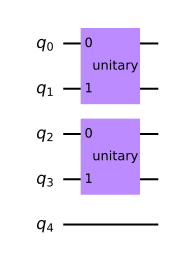

In [3]:
from qiskit import QuantumCircuit

qv_layer = QuantumCircuit(SIZE)
for pair in range(SIZE//2):  # number of pairs is SIZE/2
    qubit_indices = qubit_list[pair*2:pair*2+2]
    gate = random_unitary(4)
    qv_layer.append(gate, qubit_indices)

qv_layer.draw()

Now we can create a layer from a list of qubits, all we need to do is randomly change the order of the qubits and repeat. Python has a built-in function to shuffle lists (note that this works ‘in place’, so the data `qubit_lists` refers to will change).

In [4]:
from random import shuffle
shuffle(qubit_list)
qubit_list

[2, 4, 1, 0, 3]

<!-- ::: q-block.exercise -->

## Exercise
    
Create a function, <code>random_square_circuit(n)</code> that takes an integer <code>n</code>, and returns a random <code>QuantumCircuit</code> with width and depth <code>n</code>, that could be used in a quantum volume experiment. You may use the code shown above in your solution.

[Try in IBM Quantum Lab](https://quantum-computing.ibm.com/lab)

<!-- ::: -->


Qiskit also provides a circuit class, `QuantumVolume` (imported here as `QuantumVolumeCircuit`), that creates these circuits for us. We just need to specify the number of qubits we want to use. In the cell below, we create a quantum volume circuit with four qubits, which tests for a quantum volume of 16.

In [5]:
from qiskit.circuit.library import QuantumVolume as QuantumVolumeCircuit
qv_circuit = QuantumVolumeCircuit(4)
qv_circuit.decompose().draw()  # .decompose() unrolls the circuit one level

## Running the circuit

So how do we know if the quantum circuit is being run correctly? The quantum volume protocol is run on a perfect simulator as well as the quantum device we’re testing. We can then compare the simulated results (what the quantum computer _should_ do) to the experimental results (what the quantum computer _actually does_).

![quantum volume circuit](images/qv_device_v_sim.png)

## What would an ideal quantum computer do?

Each circuit has an ideal output distribution. This distribution is what we’d see if we ran the circuit on a perfect quantum computer, as the number of shots approaches infinity. We can calculate this ideal distribution for small circuits using Qiskit's `Statevector` class. Let’s try this on the four-qubit circuit we created above:

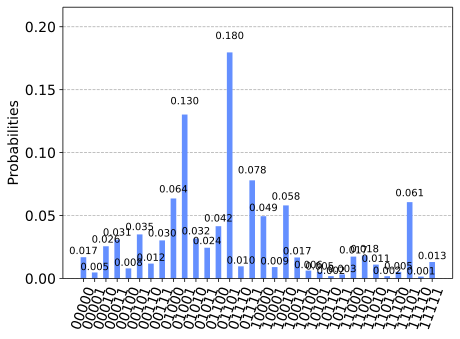

In [7]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
ideal_results = Statevector.from_instruction(
                                           qv_circuit).probabilities_dict()
plot_histogram(ideal_results)

The _heavy outputs_ of a circuit are the outputs with probability of occurring greater than the median probability. For any circuit, half the possible outputs are heavy outputs.

![computational basis state](images/qv_heavy_outputs.svg)

Below is a function, <code>get_heavy_outputs</code>, that extracts the heavy outputs from an experiment’s counts:


In [8]:
def get_heavy_outputs(counts):
    """Extract heavy outputs from counts dict.
    Args:
        counts (dict): Output of `.get_counts()`
    Returns:
        list: All states with measurement probability greater
              than the mean.
    """
    # sort the keys of `counts` by value of counts.get(key)
    sorted_counts = sorted(counts.keys(), key=counts.get)
    # discard results with probability < median
    heavy_outputs = sorted_counts[len(sorted_counts)//2:]
    return heavy_outputs

print(get_heavy_outputs(ideal_results))

['11000', '11001', '01011', '00010', '00111', '00011', '01010', '00101', '01100', '10000', '10010', '11101', '01000', '01111', '01001', '01101']


We run each circuit on our device and record the number of outputs that are heavy outputs. 
To pass the heavy output test, we want the probability of measuring a heavy output to be greater than two-thirds. I.e. over a large enough number of circuits we have:

$$\frac{\class{qv_nh}{n_h}}{\class{qv_nc}{n_c}\class{qv_ns}{n_s}}\gt{\frac{2}{3}}$$

Where $n_h$ is the number of heavy outputs measured, $n_c$ is the number of circuits we created, and $n_s$ is the number of times we run each circuit (shots). But how do we decide what a “large enough” number of experiments is? Firstly, quantum volume requires at least 100 circuits are run, otherwise the test is invalid. Secondly, an adjusted threshold is used to ensure approximately 97% confidence:

$$\frac{\class{qv_nh}{n_h} -\cssId{qv_z}{z}\sqrt{\class{qv_nh}{n_h}(\class{qv_ns}{n_s}-\cssId{qv_nhnc}{\frac{n_h}{n_c}})}}{\class{qv_nc}{n_c}\class{qv_ns}{n_s}}\gt\frac{2}{3}$$

Adding the new term (enclosed in the square root) requires a greater heavy output probability to satisfy the inequality, or a greater number of runs. Since the new term grows more slowly than the other terms, for lots of runs this inequality resembles the simpler one shown above. If a quantum volume test satisfies the above inequality, there is at least a 97% chance the heavy output probability is greater than 2/3.

Below is a function (<code>check_threshold</code>) that evaluates this inequality:


In [9]:
def check_threshold(nheavies, ncircuits, nshots):
    """Evaluate adjusted threshold inequality for quantum volume.
    Args:
        nheavies (int): Total number of heavy outputs measured from device
        ncircuits (int): Number of different square circuits run on device
        nshots (int): Number of shots per circuit
    Returns:
        Bool:
            True if heavy output probability is > 2/3 with 97% certainty,
            otherwise False
    """
    from numpy import sqrt
    numerator = nheavies - 2*sqrt(nheavies*(nshots-(nheavies/ncircuits)))
    return bool(numerator/(ncircuits*nshots) > 2/3)

<!-- ::: q-block.exercise -->

## Exercise
    
We now have everything we need to check if a quantum device can achieve a specific quantum volume. Below are the steps of an algorithm that checks if a device can achieve a specific quantum volume, try to order them correctly.

Algorithm to test if algorithm passes a quantum volume test.
    Inputs: <code>d, nc > 100, ns</code>


    q-drag-and-drop-code
        .line Let nh = 0
        .line For nc repetitions do:
            .line Let U be a randomly generated d×d quantum circuit
            .line Let Hu be a list of U’s heavy outputs
            .line For ns repetitions do:
                .line Let x be the result of executing U on the device
                .line If x is in Hu:
                    .line Increase nh by 1
        .result-info.md Return evaluation of $\phantom{a}\frac{n_h {-} z\sqrt{n_h({n_s}-{\frac{n_h}{n_c}})}}{n_cn_s}\gt\frac{2}{3}$

<!-- ::: -->


Here is the algorithm as Qiskit code:

In [14]:
from qiskit import transpile
def test_qv(device, nqubits, ncircuits, nshots):
    """Try to achieve 2**nqubits quantum volume on device.
    Args:
        device (qiskit.providers.Backend): Device to test.
        nqubits (int): Number of qubits to use for test.
        ncircuits (int): Number of different circuits to run on the device.
        nshots (int): Number of shots per circuit.
    Returns:
        Bool
            True if device passes test, otherwise False.
    """
    def get_ideal_probabilities(circuit):
        """Simulates circuit behaviour on a device with no errors."""
        state_vector = Statevector.from_instruction(
                circuit.remove_final_measurements(inplace=False)
            )
        return state_vector.probabilities_dict()

    def get_real_counts(circuit, backend, shots):
        """Runs circuit on device and returns counts dict."""
        t_circuit = transpile(circuit, backend)
        job = backend.run(t_circuit,
                          shots=shots,
                          memory=True)
        return job.result().get_counts()

    # generate set of random circuits
    qv_circuits = [
        QuantumVolumeCircuit(nqubits) for c in range(ncircuits)
    ]

    nheavies = 0  # number of measured heavy outputs
    for circuit in qv_circuits:
        # simulate circuit
        ideal_heavy_outputs = get_heavy_outputs(
            get_ideal_probabilities(circuit)
        )
        # run circuit on device
        circuit.measure_all()
        real_counts = get_real_counts(circuit, device, nshots)
        # record whether device result is in the heavy outputs
        for output, count in real_counts.items():
            if output in ideal_heavy_outputs:
                nheavies += count

    # do statistical check to see if device passes test
    is_pass = check_threshold(nheavies, ncircuits, nshots)
    # calculate percentage of measurements that are heavy outputs
    percent_heavy_outputs = nheavies*100/(ncircuits * nshots)

    print(f"Quantum Volume: {2**nqubits}\n"
          f"Percentage Heavy Outputs: {percent_heavy_outputs:.1f}%\n"
          f"Passed?: {is_pass}\n")
    return is_pass

And an example of using this to see if a simulated [Santiago](gloss:santiago) device can achieve quantum volume 16:

In [15]:
from qiskit.providers.fake_provider import FakeSantiago
santiago = FakeSantiago()
test_qv(santiago, 4, ncircuits=150, nshots=50)

Quantum Volume: 16
Percentage Heavy Outputs: 75.7%
Passed?: True



True

<!-- ::: q-block.exercise -->

## Exercise
    
What is the maximum quantum volume you can achieve using a simulated Athens device? What affect does changing the list of qubits have? What affect does changing the optimization level have? Can you do anything to improve the score?

[Try in IBM Quantum Lab](https://quantum-computing.ibm.com/jupyter)

<!-- ::: -->


## Using Qiskit’s quantum volume tools

The `qiskit-experiments` package also includes tools to measure quantum volume. First, we'll set up a fake device (`Boeblingen`) to demonstrate this on.

In [ ]:
from qiskit.providers.fake_provider import FakeBoeblingen
boeblingen = FakeBoeblingen()

Next, we create a `QuantumVolume` experiment using this device and a subset of its qubits.

In [ ]:
from qiskit_experiments.library import QuantumVolume
qv_experiment = QuantumVolume(qubits=[0, 1, 2],
                              backend=boeblingen)

Finally, we run this experiment and view the results. The method `.analysis_results()` returns a list of different result objects, so we'll iterate through them and print each one.

In [ ]:
result = qv_experiment.run()
for analysis in result.analysis_results():
    print(analysis)

We can see the device achieved a quantum volume of 8. The result also generates a figure we can access using the code below:

In [ ]:
result.figure(0)

Try increasing the number of qubits in the experiment above; how does Boeblingen perform?

It’s easy to imagine that, with a smart selection of qubits and lots of circuits, we could also achieve a quantum volume of 16 on the mock Boeblingen device as IBM has achieved on the real Boeblingen device. To provide another example, below is an image taken from IBM’s demonstration of QV64 on the Montreal device [2].

![Quantum volume of 64 measured on IBM Quantum's Montreal device](images/qv_montreal.png)

You can read more about how this was achieved in the paper [here](https://arxiv.org/pdf/2008.08571.pdf).

## References

[1] Andrew W. Cross, Lev S. Bishop, Sarah Sheldon, Paul D. Nation, and Jay M. Gambetta, Validating quantum computers using randomized model circuits, Phys. Rev. A 100, 032328 (2019). https://arxiv.org/pdf/1811.12926

[2] Petar Jurcevic et. al. Demonstration of quantum volume 64 on a superconducting quantum computing system
https://arxiv.org/pdf/2008.08571.pdf